# <b><i> Gaganpreet (U20240198)

#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
print(1)

1


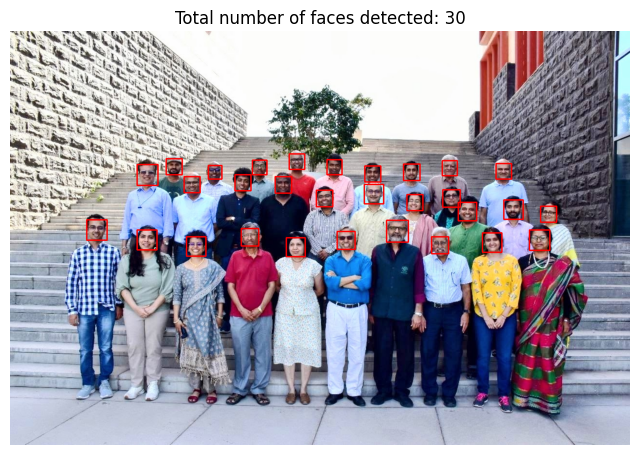

In [3]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")
## Convert the image to grayscale
gray_img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.8 ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-3), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
# cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Displaying image using Matplotlib
# Convert BGR to RGB for correct display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("plaksha_faculty_faces.jpg", img_rgb)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title(f"Total number of faces detected: {len(faces_rect)}")
plt.axis("off")  # Hide axes
plt.show()

C:\Users\Plaksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


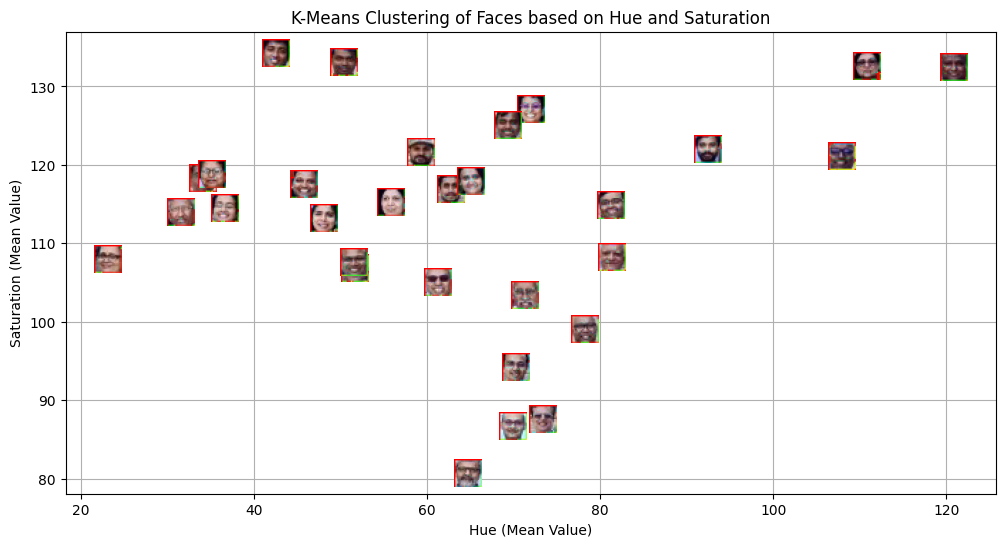

In [4]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)



## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans.fit(hue_saturation)


centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])



## Put x label
## Put y label
## Put title
## Put grid
## show the plot
plt.xlabel("Hue (Mean Value)")
plt.ylabel("Saturation (Mean Value)")
plt.title("K-Means Clustering of Faces based on Hue and Saturation")
plt.grid(True)
plt.savefig("face_clusters.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Plaksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Plaksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Plaksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Plaksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

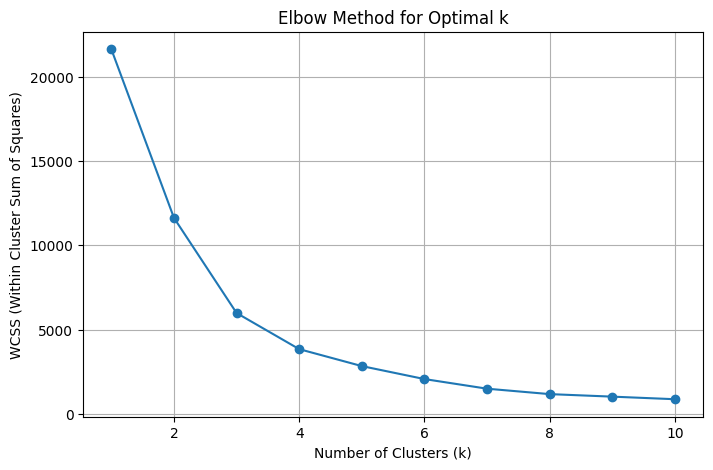

In [5]:
# Elbow method
# Try different values of k to find optimal value
wcss_vals = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init = 20)
    kmeans_temp.fit(hue_saturation)
    wcss_vals.append(kmeans_temp.inertia_)   # inertia_ = WCSS

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss_vals, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.savefig("optimal_K.png", dpi=300, bbox_inches="tight")
plt.show()


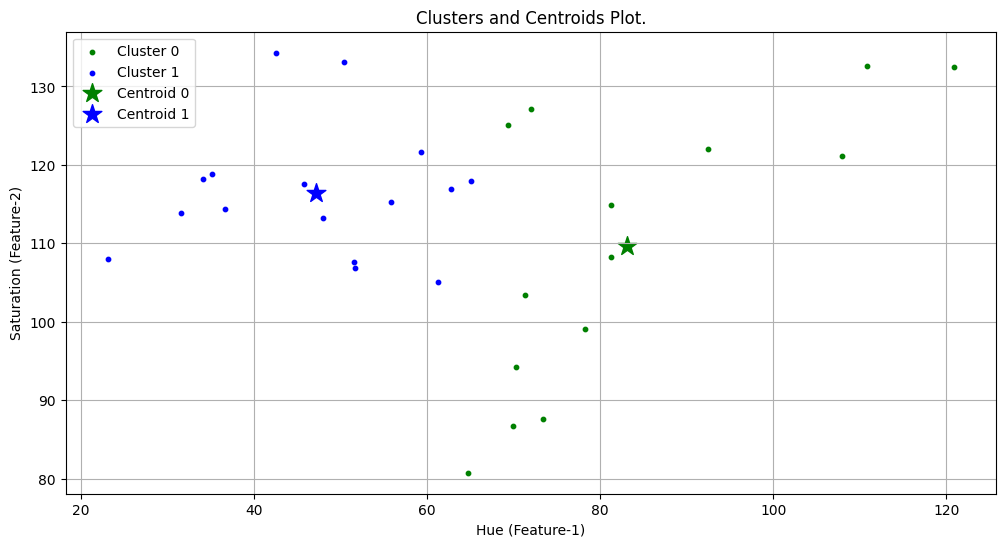

In [6]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0", s=10)

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1", s=10)

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='green', marker='*', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='blue', marker='*', s=200, label="Centroid 1")

plt.xlabel("Hue (Feature-1)")
plt.ylabel("Saturation (Feature-2)")
plt.title("Clusters and Centroids Plot.")
plt.legend()
plt.grid()
plt.savefig("cluster_and_centroids.png", dpi=300, bbox_inches="tight")
plt.show()

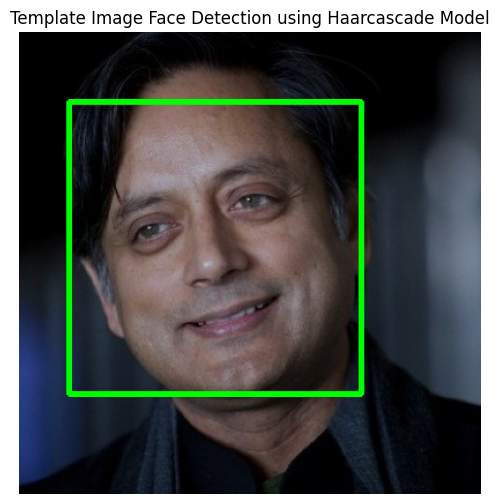

In [7]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.05, minNeighbors=4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# cv2.imshow("Template Face Detection", template_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Converting BGR to RGB for correct display using matplotlib
template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(8, 6))
plt.imshow(template_img_rgb)
plt.title("Template Image Face Detection using Haarcascade Model")
plt.axis("off")  # Hide axes
plt.savefig("template_image.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_17284\1120448059.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


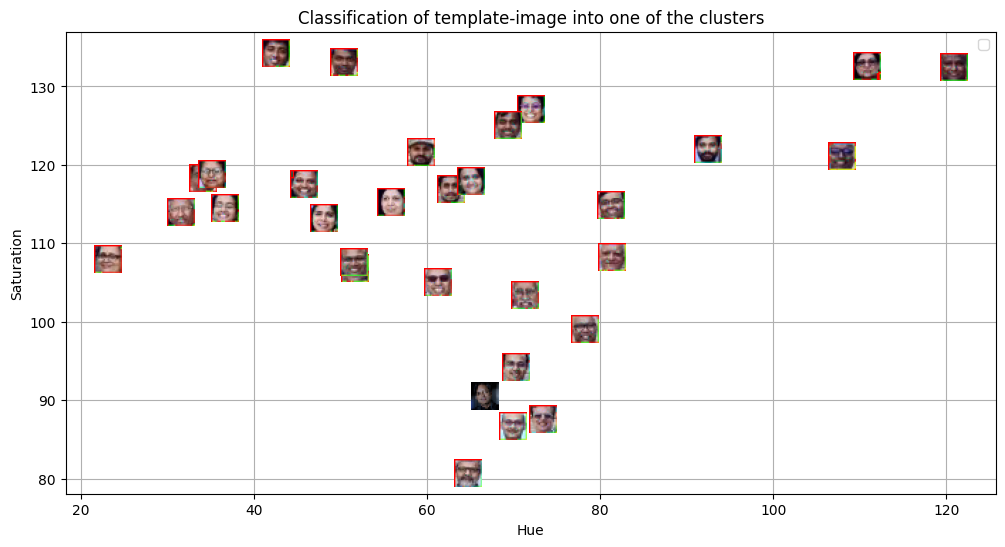

In [8]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Classification of template-image into one of the clusters")
plt.legend()
plt.grid()
plt.savefig("classification_of_template_image.png", dpi=300, bbox_inches="tight")
plt.show()

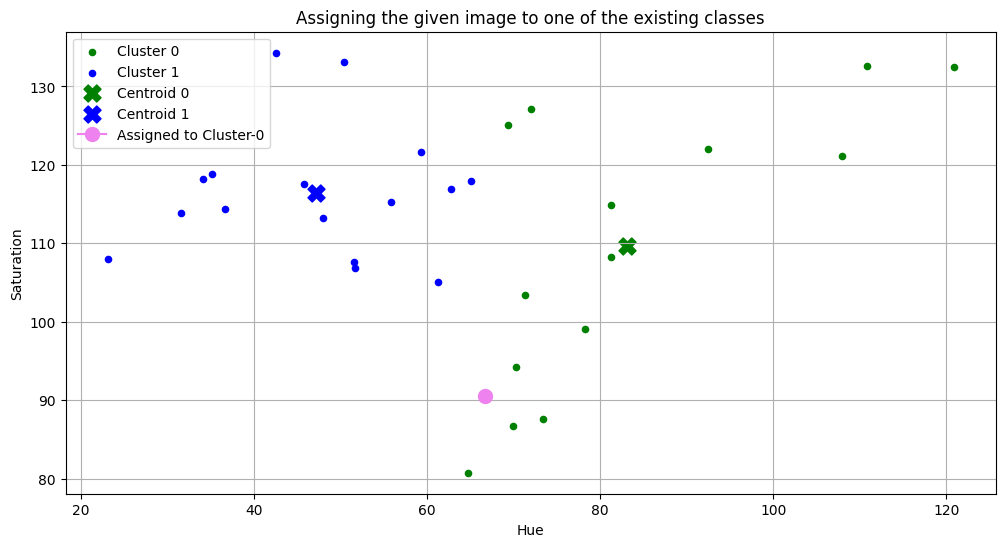

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0', s=20)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1', s=20)

# Calculate and plot centroids for both the clusters
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='X', s=150, label='Centroid 0')  # plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='X', s=150, label='Centroid 1')  # plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=f'Assigned to Cluster-{template_label}' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Assigning the given image to one of the existing classes")
plt.legend()
plt.grid()
plt.savefig("classification_of_template_image_scatter.png", dpi=300, bbox_inches="tight")
plt.show()
## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
- Euclidean distance
- Mahalanobis distance
- Manhattan distance
- Chebyshev distance
- Minkowski distance (Generalized distance metric)
- Cosine distance
- Hamming distance


#### 2. What are some real-world applications of distance-based classification algorithms? 
- Face Recognition & Image Classification : Systems compare distances between facial feature vectors. Example: unlocking phones, attendance systems. Similar faces → smaller distance.
- Medical Image analysis : Patients are classified based on similarity of symptoms or test results.
- Financial Fraud Detection: Detecting financial activity as suspicious, or not suspicious.
- Email Spam detection: Classifying an image as spam or not.
- Language Sentiment analysis: Classifying a person's mood(to happy, sad, etc) based on his/her audio sample.
- Recommendation Systems : Netflix, Amazon, Spotify suggest items based on user similarity.



#### 3. Explain various distance metrics. 

- <b>Eucledian distance </b>: The shortest distance between two vectors.
- <b>Mahalanobis distance</b>: A distance b/w a vector and a distribution. Assumes the given vectors follow a normal-distribution, and accordingly assigns each vector a distance-value from the distribution.
- <b>Manhattan distance </b>: Sum of the absoulte difference b/w each individual components of 2 vectors. Aka, taxicab-distance, city-block distance.
- <b>Chebyshev distance</b>: Maximum of the absolute difference b/w each individual components of 2 vectors. Aka, chessboard distance.
- <b>Minkowski distance</b>: A generalized formula. Substitute different values of p to achieve different distances.
eg. p=1 : Manhattan , p=2: Eucledian, p->infinity : Chebyshev
- <b> Cosine distance</b>: 1 - cos(The angle b/w the 2 vectors)
- <b>Hamming distance</b>: A distance-metric calculated b/w 2 strings. It's the minimum number of substitutions required to change one string into the other

#### 4. What is the role of cross validation in model performance? 
- Cross Validation helps prevent overfitting of a model. 
- A single train-test split might give biased-results, depending on how the data is split. Cross-validation basically utilizes the data-set in a way such that the model gets trained better than what happens when a single train-test set is used. Thus model performace improves.
- It can be useful in tuning the hyperparameters of the model. We choose the best hyper-parameter values based on the model's performace on different training subsets.

#### 5. Explain variance and bias in terms of KNN? 
- <b>Bias </b> - Bias in KNN is the error that results from the model's inherent assumptions, which may oversimplify the true relationship in the data, leading to underfitting.
- <b>Variance in KNN</b> - Variance measures how much the model's predictions change if a different training dataset were used. High variance indicates the model is too sensitive to the specific noise and fluctuations in the training data, leading to overfitting.
- Low k has low bias and high variance and the model will be sensitive to noise which cause overfitting High k has high bias and low variance and the model becomes smoother which may underfit